In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("loan_data_set.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
print(df.shape)
df.info()

(614, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


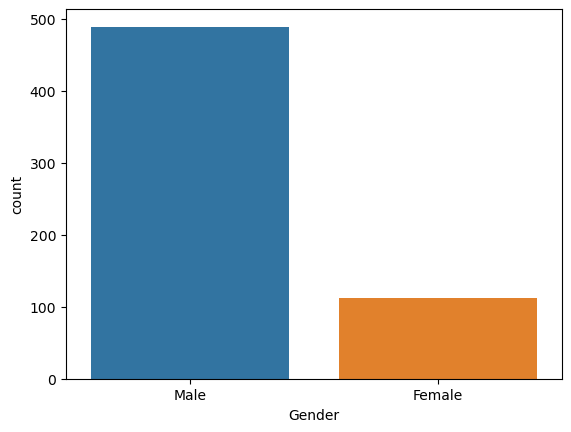

In [4]:
sns.countplot(x="Gender", data=df)
plt.show()

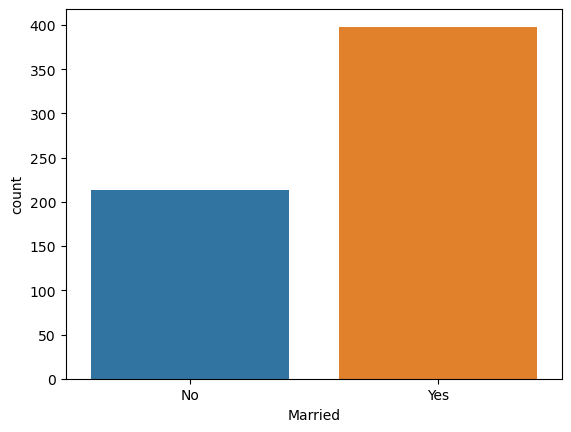

In [5]:
sns.countplot(x="Married", data=df)
plt.show()

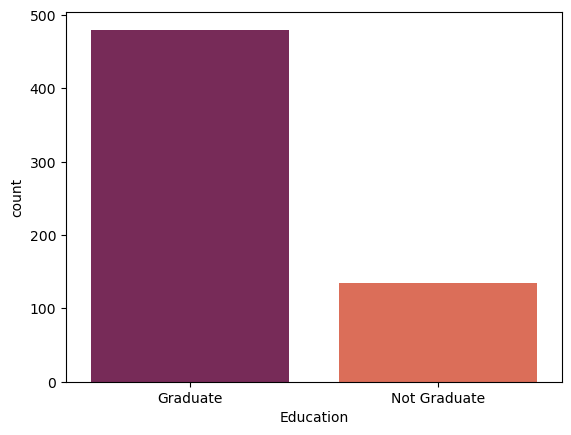

In [6]:
sns.countplot(x="Education", data=df, palette="rocket")
plt.show()


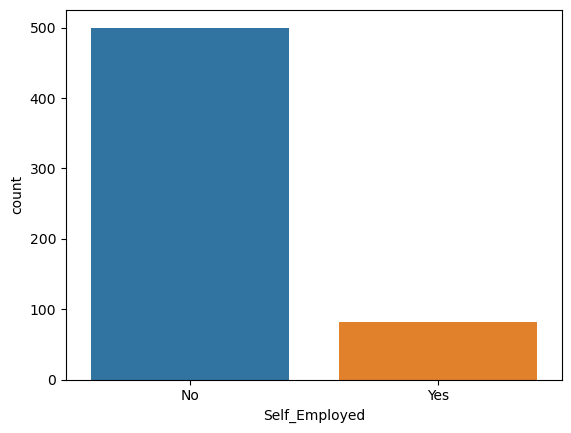

In [7]:
sns.countplot(x="Self_Employed", data=df)
plt.show()

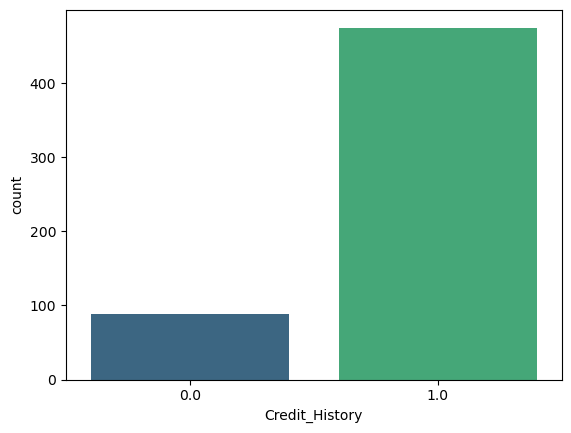

In [8]:
sns.countplot(x="Credit_History", data=df, palette="viridis")
plt.show()



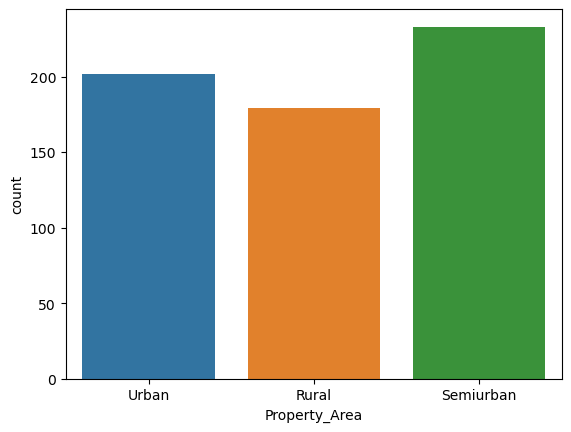

In [9]:
sns.countplot(x="Property_Area", data=df)
plt.show()

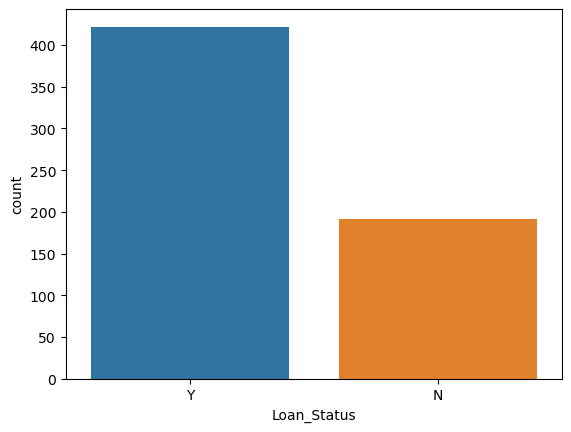

In [10]:
sns.countplot(x="Loan_Status", data=df)
plt.show()

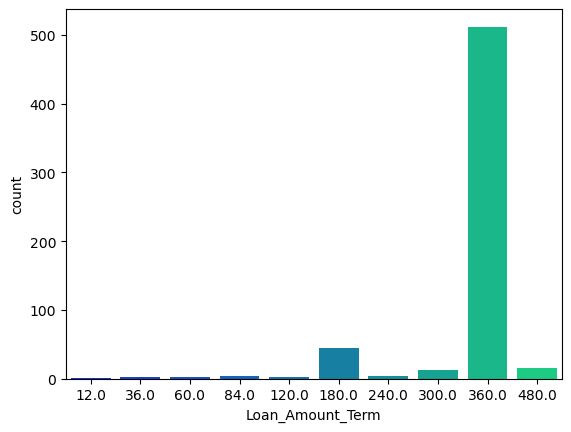

In [11]:
sns.countplot(x="Loan_Amount_Term", data=df, palette="winter")
plt.show()

/var/folders/2z/szd08bn12v7_kl6gpdnrnl3c0000gn/T/ipykernel_6829/744130851.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='inferno');


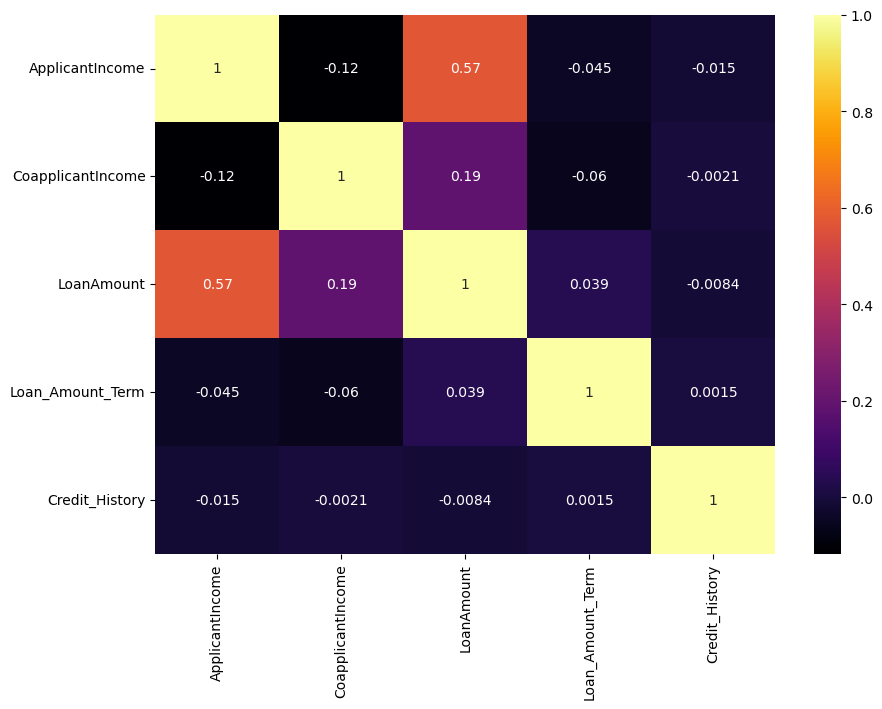

In [12]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True, cmap='inferno');

In [13]:
df.isnull().sum()


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [14]:
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].replace(np.nan,df['Loan_Amount_Term'].mean())
df.Credit_History.fillna(df.Credit_History.mean(), inplace=True)
df['LoanAmount'] = df['LoanAmount'].replace(np.nan,df['LoanAmount'].mean())
df.dropna(how="any",inplace=True)

In [15]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [16]:
df = df.drop(['Loan_ID'], axis = 1)

In [17]:
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df['Married'] = df['Married'].map({'Yes': 1, 'No': 0})
df['Dependents'] = df['Dependents'].map({'0': 0, '1': 1 ,'2': 2 ,'3+': 3})
# Education
df['Education'] = df['Education'].map({'Graduate': 1, 'Not Graduate': 0})
# Self_Employed
df['Self_Employed'] = df['Self_Employed'].map({'Yes': 1, 'No': 0})
# 'Urban', 'Rural', 'Semiurban'
df['Property_Area'] = df['Property_Area'].map({'Urban': 0, 'Rural': 1 ,'Semiurban': 2})
df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N': 0})

In [18]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,0,1
1,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,1,0
2,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,0,1
3,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,0,1
4,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,0,1


In [19]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)

In [20]:
X = df.drop(["Loan_Status"], axis=1)
y = df["Loan_Status"]

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

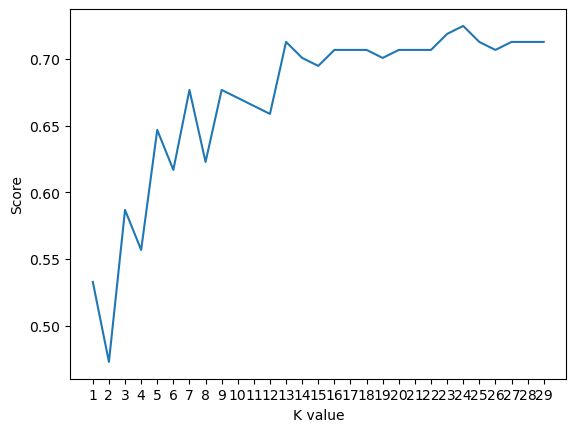

KNN best accuracy: 72.46%


In [22]:
from sklearn.neighbors import KNeighborsClassifier
scoreListknn = []
for i in range(1,30):
    KNclassifier = KNeighborsClassifier(n_neighbors = i)
    KNclassifier.fit(X_train, y_train)
    scoreListknn.append(KNclassifier.score(X_test, y_test))
    
plt.plot(range(1,30), scoreListknn)
plt.xticks(np.arange(1,30,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()
KNAcc = max(scoreListknn)
print("KNN best accuracy: {:.2f}%".format(KNAcc*100))

In [23]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
X = MinMaxScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

SVCclassifier = SVC(kernel='rbf', max_iter=500)
SVCclassifier.fit(X_train, y_train)

y_pred = SVCclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
SVCAcc = accuracy_score(y_pred,y_test)
print('SVC accuracy: {:.2f}%'.format(SVCAcc*100))

              precision    recall  f1-score   support

           0       0.91      0.42      0.57        48
           1       0.81      0.98      0.89       119

    accuracy                           0.82       167
   macro avg       0.86      0.70      0.73       167
weighted avg       0.84      0.82      0.80       167

[[ 20  28]
 [  2 117]]
SVC accuracy: 82.04%


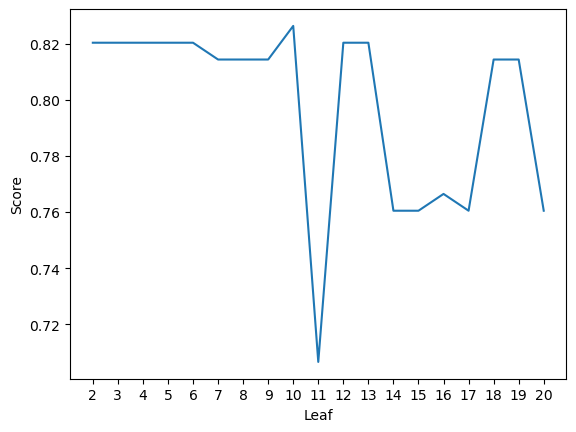

Decision Tree Accuracy: 82.63%


In [24]:
from sklearn.tree import DecisionTreeClassifier
scoreListDT = []
for i in range(2,21):
    DTclassifier = DecisionTreeClassifier(max_leaf_nodes=i)
    DTclassifier.fit(X_train, y_train)
    scoreListDT.append(DTclassifier.score(X_test, y_test))
    
plt.plot(range(2,21), scoreListDT)
plt.xticks(np.arange(2,21,1))
plt.xlabel("Leaf")
plt.ylabel("Score")
plt.show()
DTAcc = max(scoreListDT)
print("Decision Tree Accuracy: {:.2f}%".format(DTAcc*100))

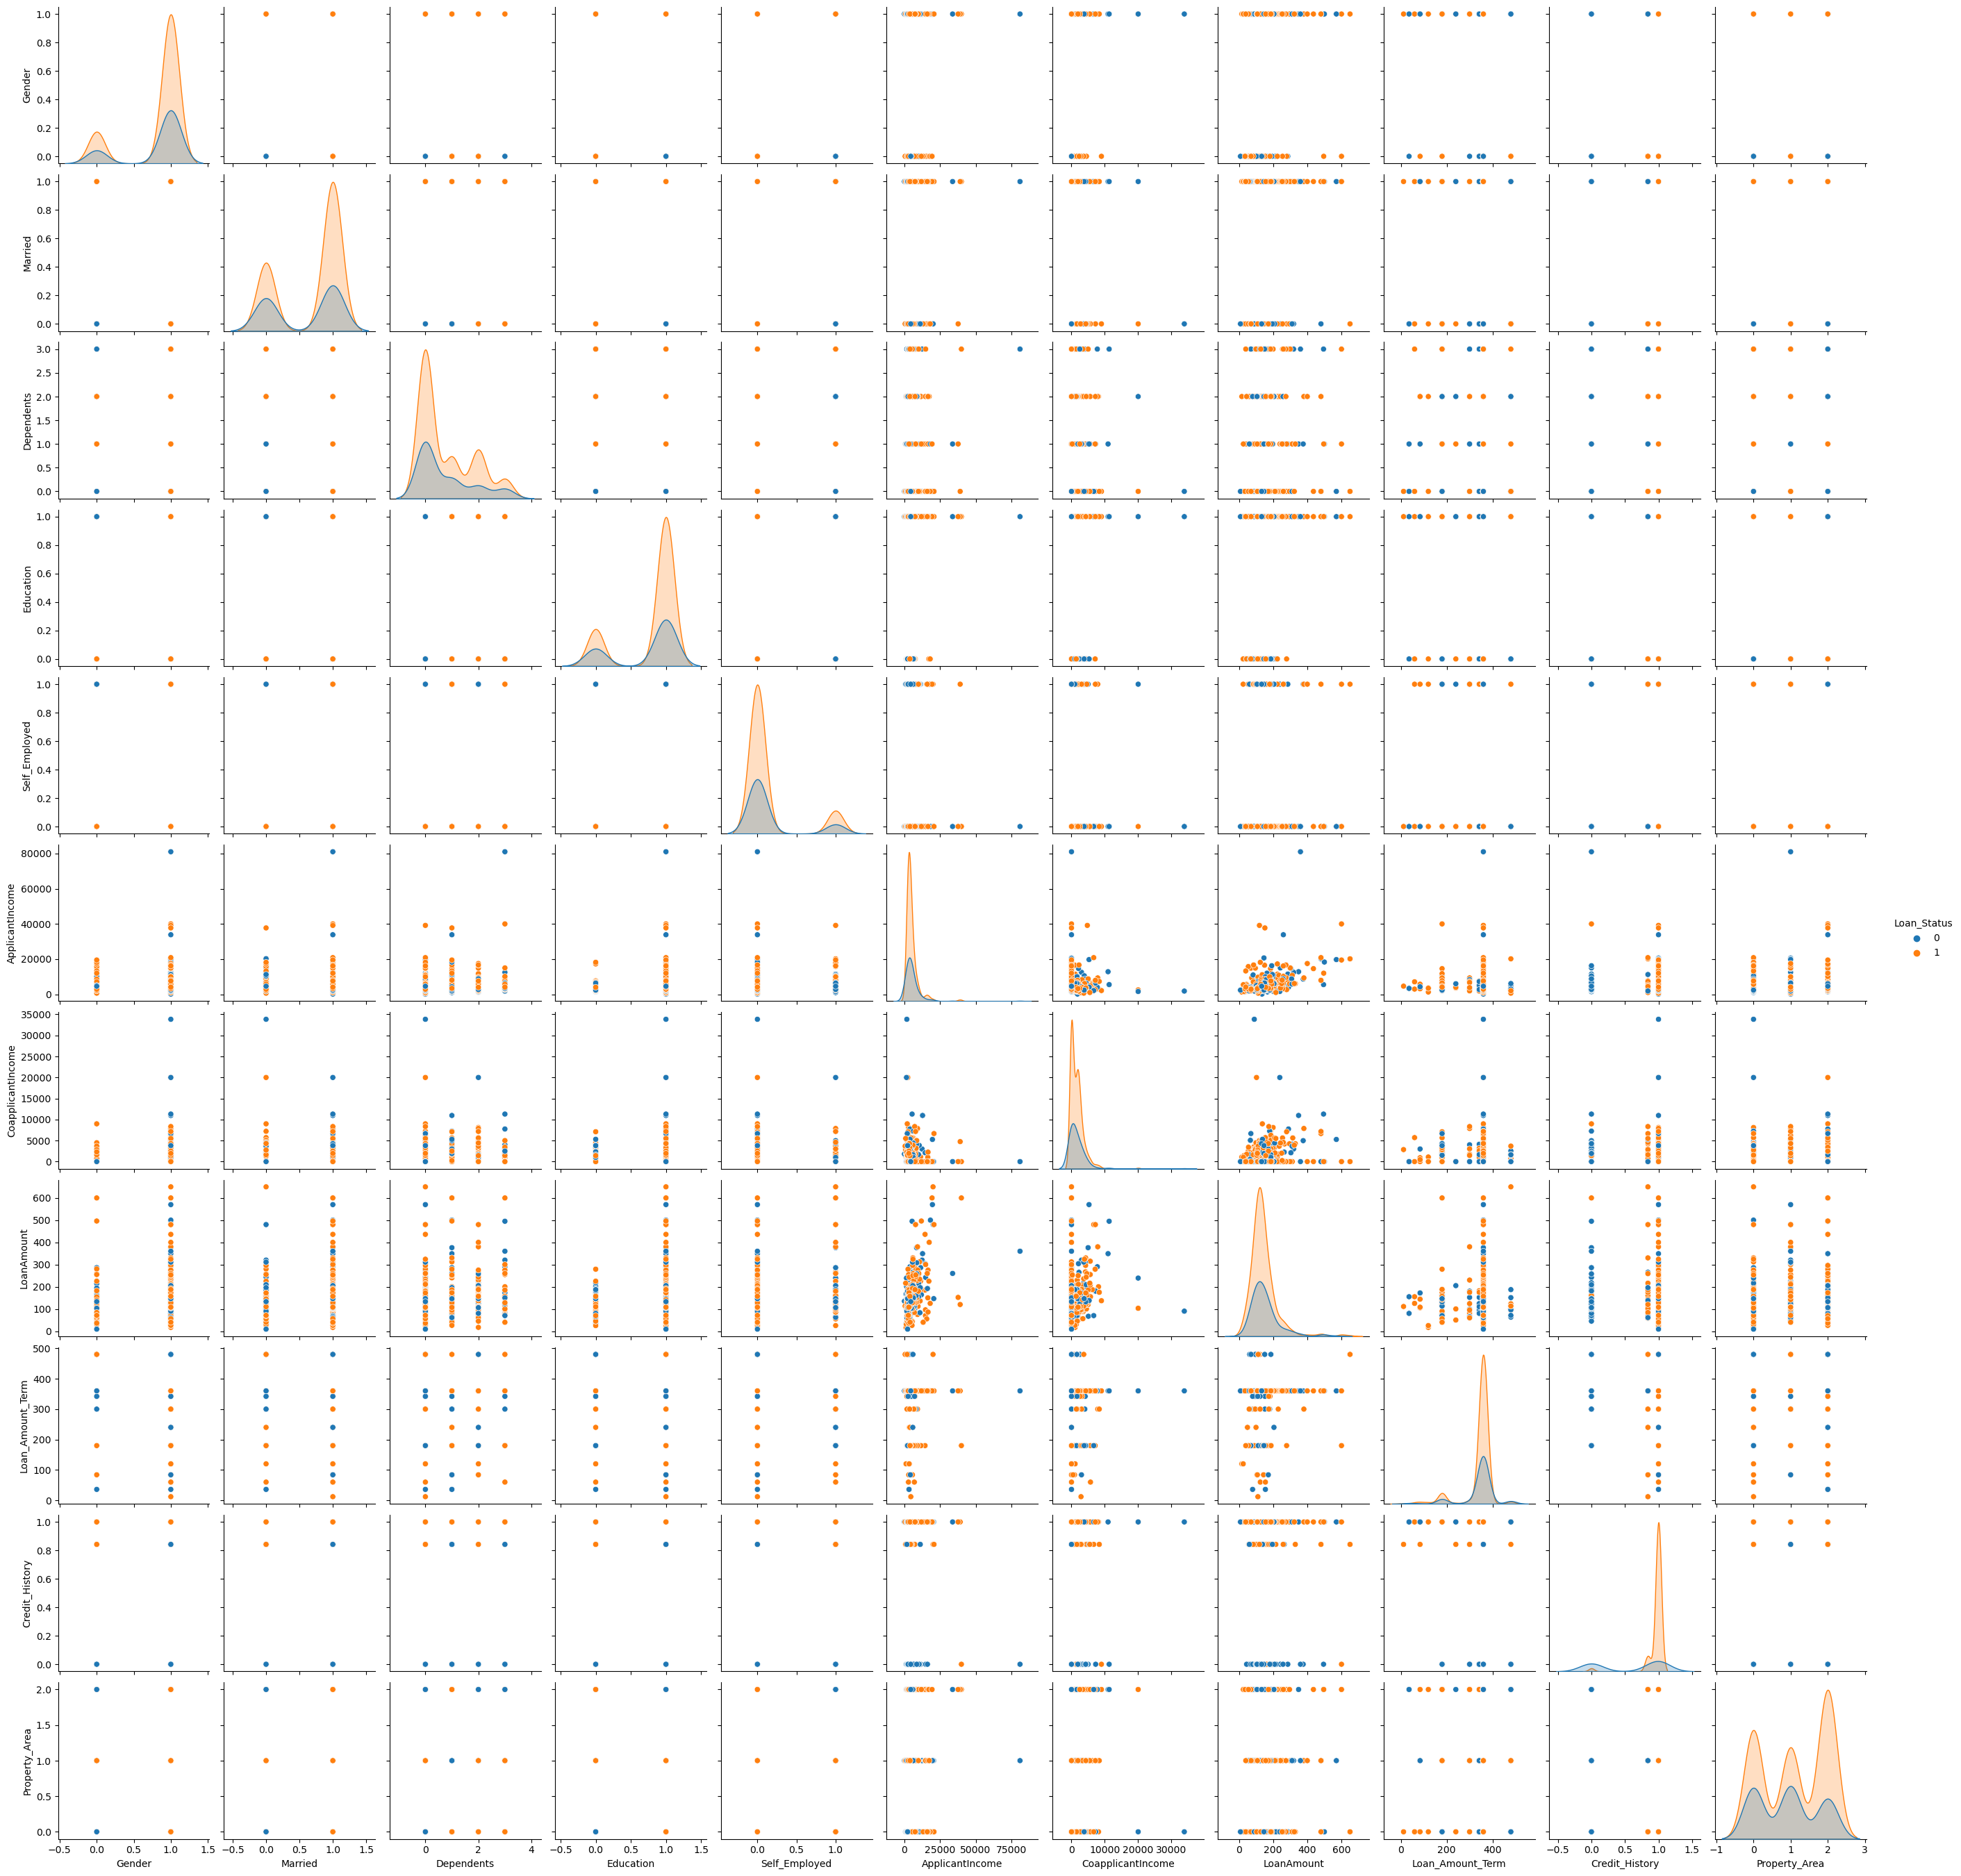

In [31]:
sns.pairplot(df, hue = 'Loan_Status')

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
RandomizedSearchCV
paramsGB={'n_estimators':[100,200,300,400,500],
      'max_depth':[1,2,3,4,5],
      'subsample':[0.5,1],
      'max_leaf_nodes':[2,5,10,20,30,40,50]}

In [33]:
GB = RandomizedSearchCV(GradientBoostingClassifier(), paramsGB, cv=20)
GB.fit(X_train, y_train)


RandomizedSearchCV(cv=20, estimator=GradientBoostingClassifier(),
                   param_distributions={'max_depth': [1, 2, 3, 4, 5],
                                        'max_leaf_nodes': [2, 5, 10, 20, 30, 40,
                                                           50],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500],
                                        'subsample': [0.5, 1]})

In [34]:
print(GB.best_estimator_)
print(GB.best_score_)
print(GB.best_params_)
print(GB.best_index_)

GradientBoostingClassifier(max_depth=4, max_leaf_nodes=2, n_estimators=400,
                           subsample=1)
0.7913157894736841
{'subsample': 1, 'n_estimators': 400, 'max_leaf_nodes': 2, 'max_depth': 4}
6


In [52]:
GBclassifier = GradientBoostingClassifier(subsample=1, n_estimators=400, max_depth=4, max_leaf_nodes=10)
GBclassifier.fit(X_train, y_train)

y_pred = GBclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
GBAcc = accuracy_score(y_pred,y_test)
print('Gradient Boosting accuracy: {:.2f}%'.format(GBAcc*100))

              precision    recall  f1-score   support

           0       0.64      0.54      0.58        52
           1       0.80      0.86      0.83       115

    accuracy                           0.76       167
   macro avg       0.72      0.70      0.71       167
weighted avg       0.75      0.76      0.75       167

[[28 24]
 [16 99]]
Gradient Boosting accuracy: 76.05%


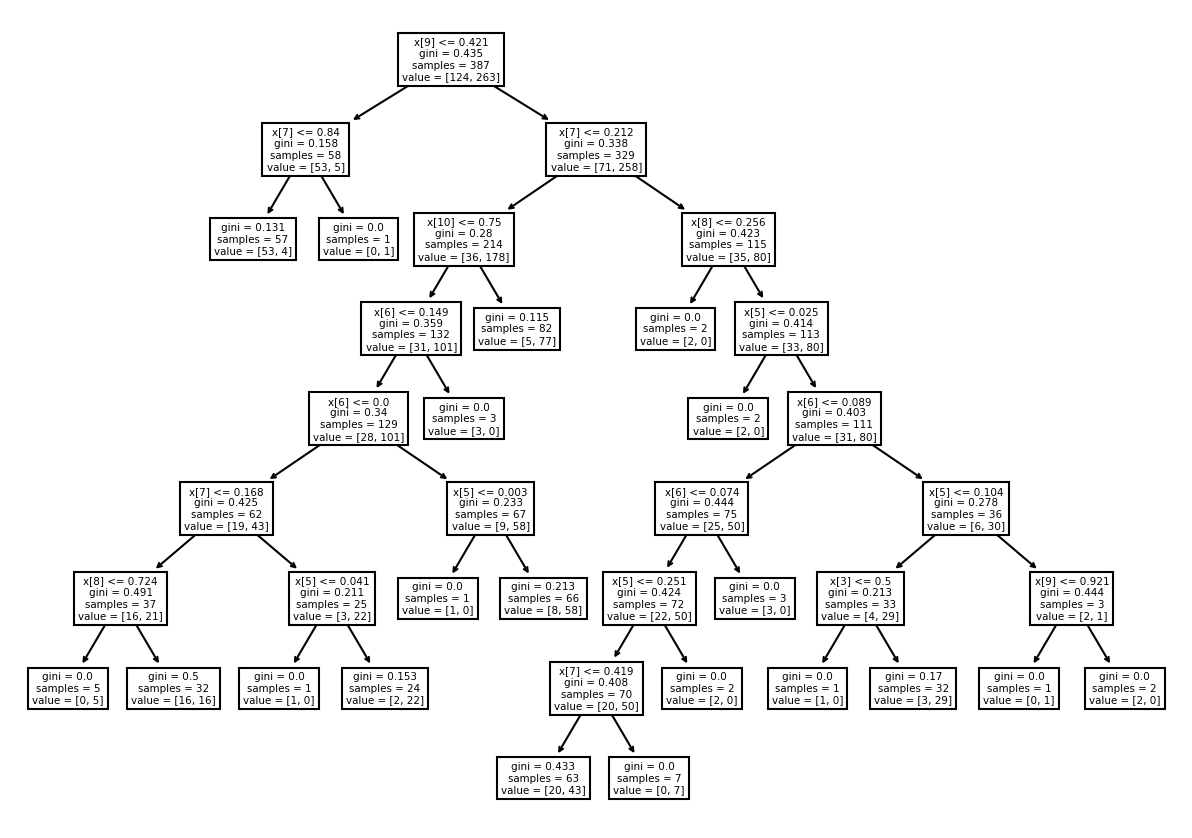

In [36]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,7),dpi=150)
plot_tree(DTclassifier);


In [39]:
from sklearn.preprocessing import StandardScaler
standardScalerX = StandardScaler()
X = standardScalerX.fit_transform(X)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,stratify =y,random_state =42)
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(25),max_iter=600,
                     solver='sgd',  random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
NNAcc = accuracy_score(y_pred,y_test)
print('Neural_network: {:.2f}%'.format(NNAcc*100))

cm = confusion_matrix(y_test, y_pred)
cm

Neural_network: 81.44%


array([[ 25,  27],
       [  4, 111]])

In [53]:
compare = pd.DataFrame({'Model': [ 'KNN', 
                                  'SVM', 'Decision Tree', 
                                  'Neural_network', 'Gradient Boost'], 
                        'Accuracy': [ KNAcc*100, SVCAcc*100, 
                                      DTAcc*100, NNAcc*100,
                                      GBAcc*100]})
compare.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
2,Decision Tree,82.634731
1,SVM,82.035928
3,Neural_network,81.437126
4,Gradient Boost,76.047904
0,KNN,72.455090


In [42]:
from sklearn.ensemble import BaggingClassifier

bagging_classifier = BaggingClassifier( n_estimators=26)
 

bagging_classifier.fit(X_train, y_train)
 
y_pred = bagging_classifier.predict(X_test)
BAcc = accuracy_score(y_test, y_pred)
print('Bagging_accurancy: {:.2f}%'.format(BAcc*100))
conf = confusion_matrix(y_test, y_pred)
conf

Bagging_accurancy: 76.65%


array([[ 26,  26],
       [ 13, 102]])

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import StackingClassifier

RNClassifier = RandomForestClassifier()
STClassifier = StackingClassifier(estimators =[('KNN',KNclassifier), ('tree', DTclassifier)], final_estimator = RNClassifier)


model_stack = STClassifier.fit(X_train, y_train)
pred_stack = model_stack.predict(X_test)
STAcc = accuracy_score(y_test,y_pred)
print('Stacking Accuracy: {:.2f}%'.format(STAcc*100))
      
conf = confusion_matrix(y_test, y_pred)
conf

Stacking Accuracy: 76.05%


array([[28, 24],
       [16, 99]])

<Axes: xlabel='Max_Depth', ylabel='Values'>

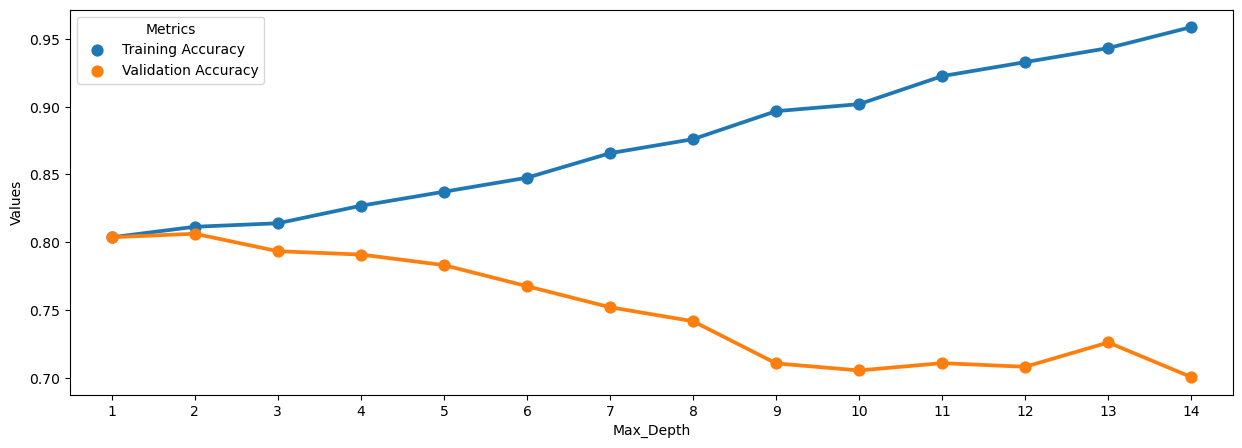

In [48]:
from sklearn.model_selection import cross_val_score
training_accuracy = []
val_accuracy = []
training_f1 = []
val_f1 = []
tree_depths = []

for depth in range(1,15):
    tree_clf = DecisionTreeClassifier(max_depth=depth)
    tree_clf.fit(X_train,y_train)
    y_training_pred = tree_clf.predict(X_train)

    training_acc = accuracy_score(y_train,y_training_pred)
    val_mean_accuracy = cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='accuracy').mean()
    
    training_accuracy.append(training_acc)
    val_accuracy.append(val_mean_accuracy)
    tree_depths.append(depth)
    

Tuning_Max_depth = {"Training Accuracy": training_accuracy, "Validation Accuracy": val_accuracy, "Max_Depth": tree_depths }
Tuning_Max_depth_df = pd.DataFrame.from_dict(Tuning_Max_depth)

plot_df = Tuning_Max_depth_df.melt('Max_Depth',var_name='Metrics',value_name="Values")
fig,ax = plt.subplots(figsize=(15,5))
sns.pointplot(x="Max_Depth", y="Values",hue="Metrics", data=plot_df,ax=ax)